In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict

In [2]:
data_pts = pd.read_json('../data/Sarcasm_Headlines_Dataset.json', lines = True)

In [38]:
hline_sarcastic_freq = defaultdict(int)
hline_notsarcastic_freq = defaultdict(int)

stopWords = set(stopwords.words('english'))

for index, row in data_pts.iterrows():
        
        words = row['headline'].split(' ')
        issarcastic = row['is_sarcastic']
        
        for word in words:
            # don't want to check stop words
            if word not in stopWords and word.isalpha():
                if issarcastic == True:
                    hline_sarcastic_freq[word] += 1
                else:
                    hline_notsarcastic_freq[word] += 1
                    
# item[1] is based on the dict, so that is the num value
hline_sarcastic_freq = sorted(hline_sarcastic_freq.items(), key = lambda item: item[1], reverse=True)
hline_notsarcastic_freq = sorted(hline_notsarcastic_freq.items(), key = lambda item: item[1], reverse=True)

In [39]:
def obtain_info(my_dict):
    freq_sarcastic = []
    word = []
    counter = 0

    for key, val in my_dict:
        if counter == 50:
            break
        word.append(key)
        freq_sarcastic.append(val)
        counter = counter + 1
        
    return word, freq_sarcastic

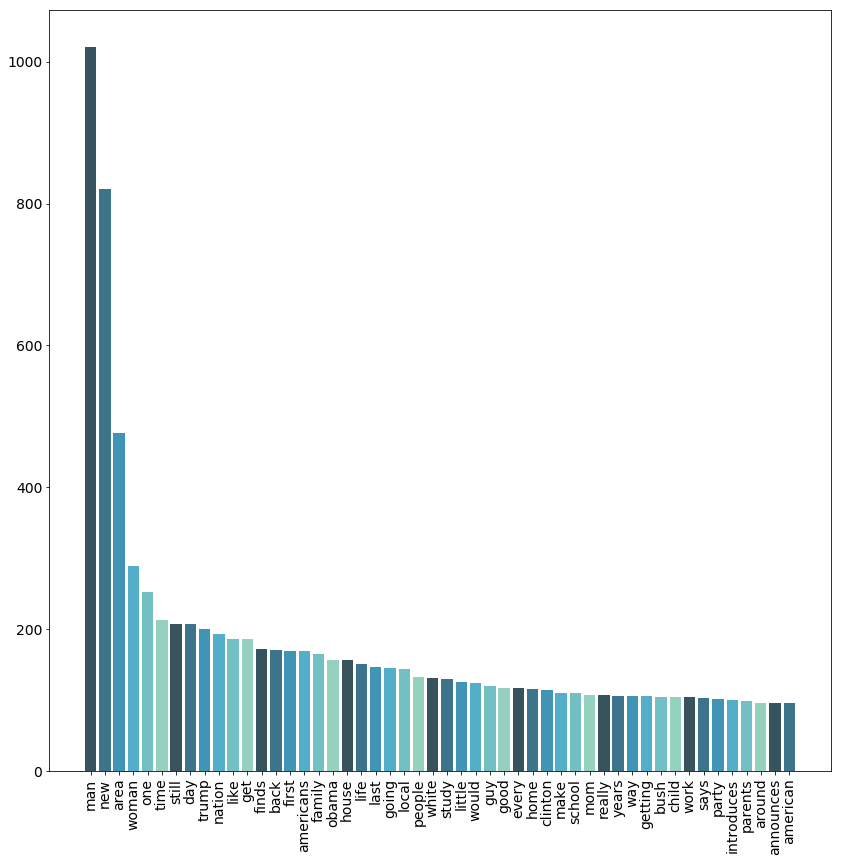

In [71]:
# plotting top 50 sarcastic word graph use a histogram of the top 20 (seaborn countplot)

# obtain frequencies of hline_sarcastic
word1, freq_sarcastic1 = obtain_info(hline_sarcastic_freq)

y_position = np.arange(len(freq_sarcastic1))

plt.bar(y_position, freq_sarcastic1, color=sns.color_palette("GnBu_d"), linewidth=10)

plt.xticks(y_position, word1, rotation='vertical', fontsize=14)
plt.yticks(fontsize=14)
fig = plt.gcf()
fig.set_size_inches(14, 14)

plt.show()

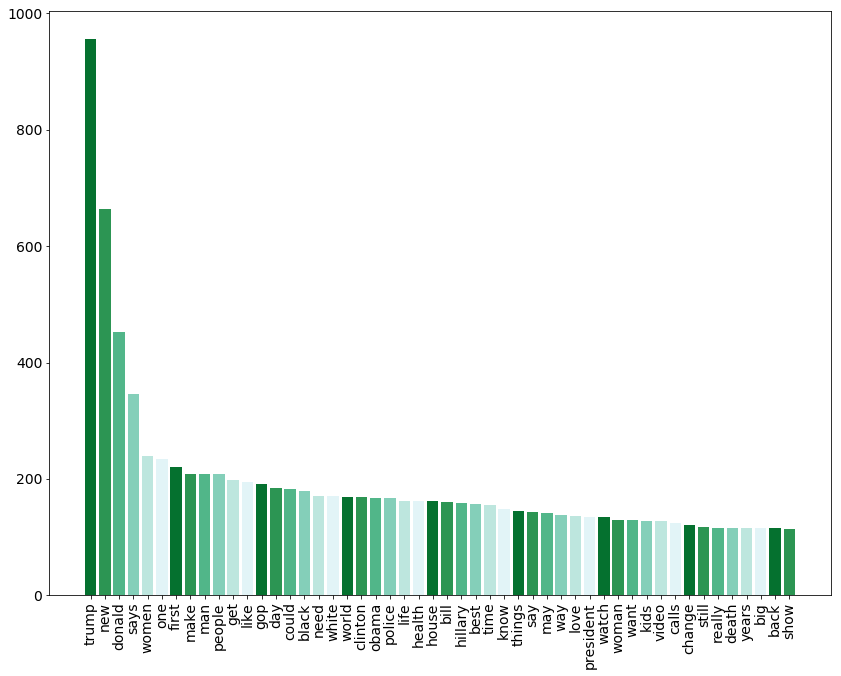

In [75]:
# plotting top 50 non-sarcastic word graph (seaborn countplot)
word2, freq_sarcastic2 = obtain_info(hline_notsarcastic_freq)

y_position = np.arange(len(freq_sarcastic2))

plt.bar(y_position, freq_sarcastic2, color=sns.color_palette("BuGn_r"), linewidth=10)

plt.xticks(y_position, word2, rotation='vertical', fontsize=14)
plt.yticks(fontsize=14)

fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.show()

In [ ]:
# plotting similarities in words to see if they are more sarcastic or non (scatter plot)